In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import klib as k

In [2]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

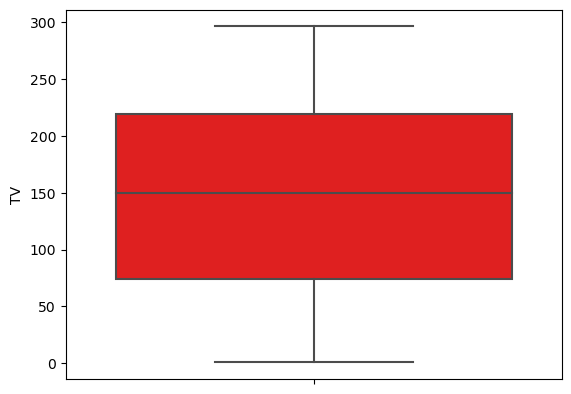

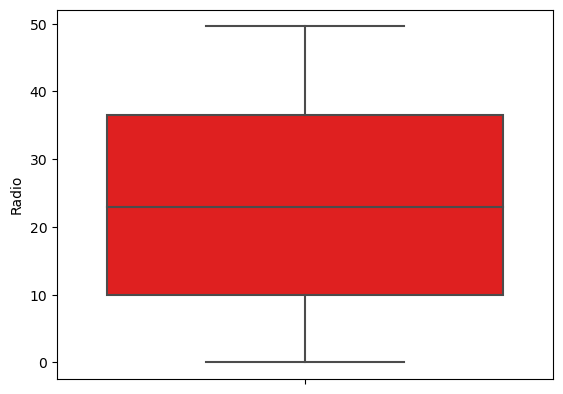

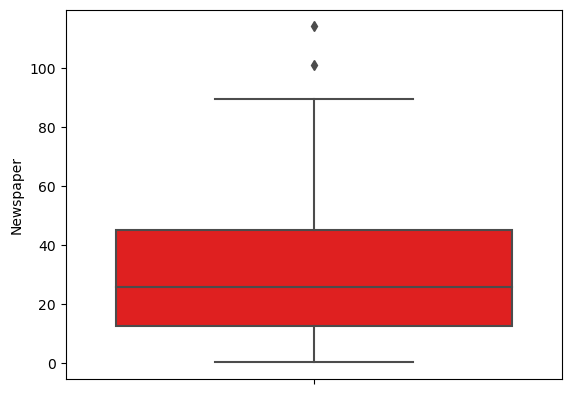

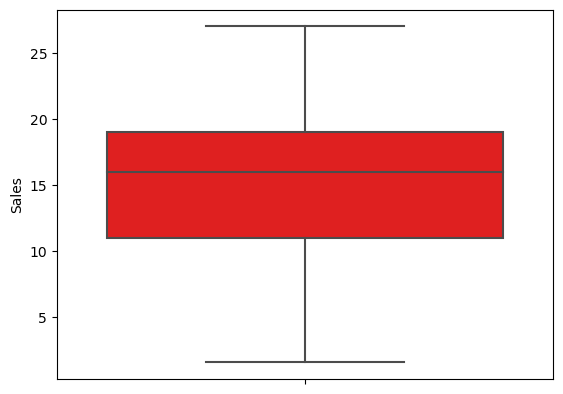

In [7]:
for i in df.columns:
    sns.boxplot(y=df[i],color="red")
    plt.show()

In [8]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [9]:
for colmn in df.columns:
    UL,LL=outlier_limit(df[colmn])
    df[colmn]=np.where((df[colmn]>UL)|(df[colmn]<LL),np.nan,df[colmn])

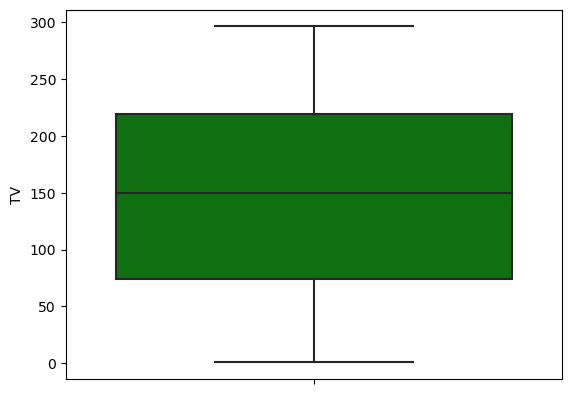

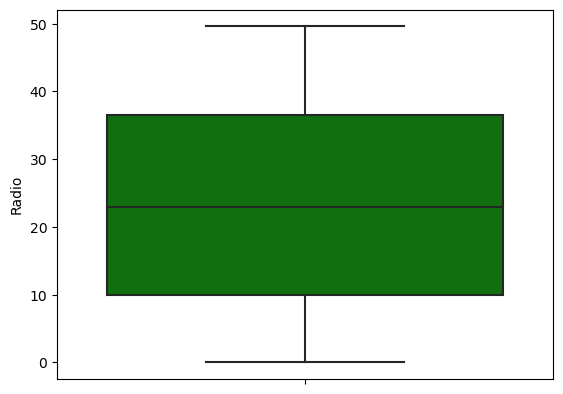

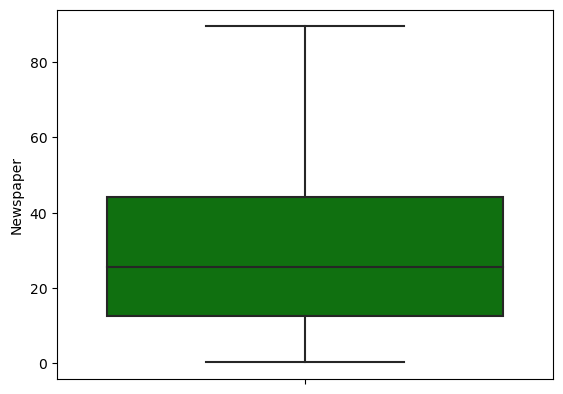

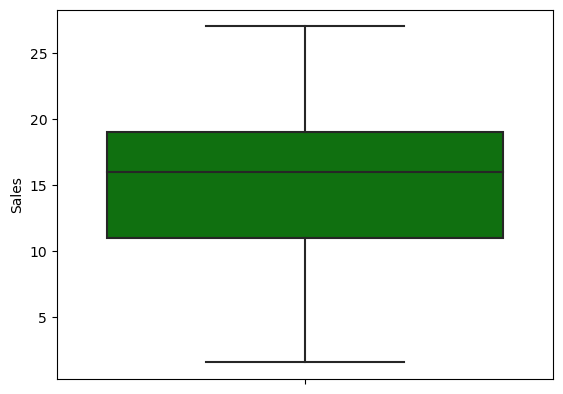

In [10]:
for i in df.columns:
    sns.boxplot(y=df[i],color="green")
    plt.show();

In [30]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

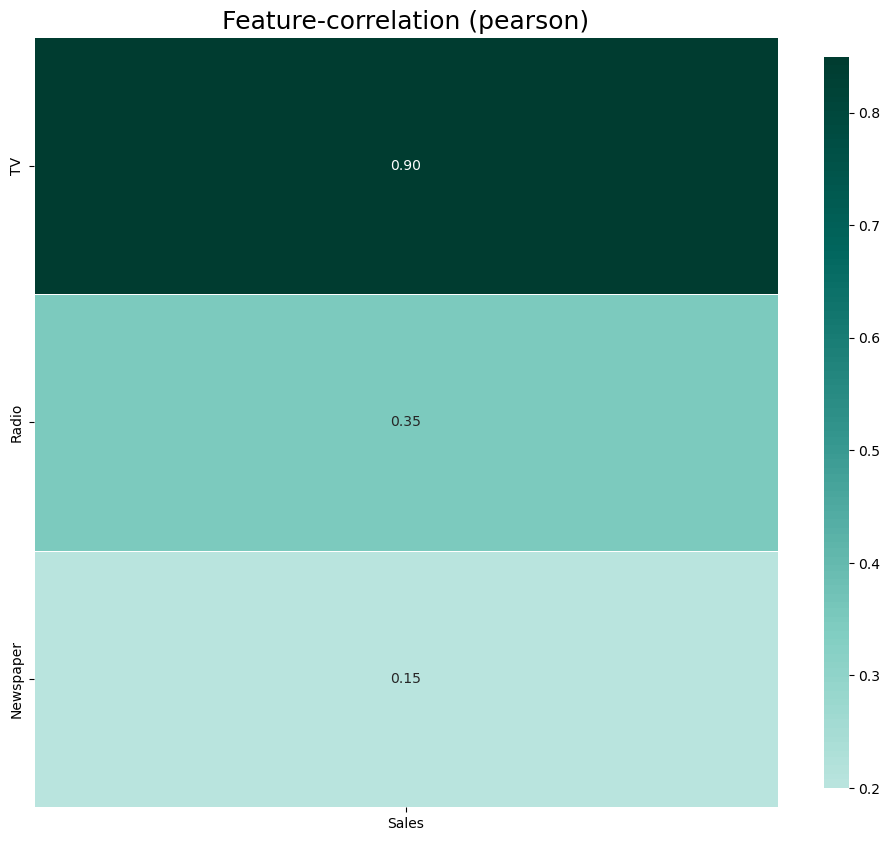

In [41]:
k.corr_plot(data=df,target="Sales")

In [12]:
df["TV"].max()

296.4

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
df.duplicated().sum()

0

In [44]:
x=df[["TV","Radio"]].values

In [45]:
x

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206.9,   8.4],
       [ 25

In [63]:
sc=StandardScaler()

In [64]:
x=sc.fit_transform(x)

In [65]:
y=df[["Sales"]].values

In [66]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11. ],
       [13

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
model.coef_

array([[4.58640637, 1.64777093]])

In [71]:
model.intercept_

array([15.01852488])

In [72]:
traing_score=model.score(x_train,y_train)*100
traing_score

89.88777400968775

In [73]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

90.76343946874582

In [74]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

1.1651808919549087

In [75]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

2.5698183851218315

In [76]:
y_pred=model.predict(x)

In [77]:
y_pred







array([[21.1377331 ],
       [11.31660218],
       [10.58108365],
       [17.29699187],
       [15.48361436],
       [10.45712044],
       [11.29369721],
       [13.2006268 ],
       [ 5.24984301],
       [15.59463498],
       [ 8.75540282],
       [18.77510674],
       [ 9.73581779],
       [10.64523195],
       [19.19392895],
       [20.37079213],
       [24.09845869],
       [10.55615477],
       [15.13693526],
       [19.38547916],
       [17.89591639],
       [ 7.03127934],
       [18.71779914],
       [ 9.30674107],
       [19.09032803],
       [15.50037291],
       [19.33057274],
       [20.9547305 ],
       [10.1313119 ],
       [23.46130509],
       [12.56325181],
       [ 9.95106287],
       [21.06962735],
       [ 9.85922687],
       [20.65304521],
       [23.78499408],
       [14.06441312],
       [ 9.84075226],
       [21.01360877],
       [17.9296195 ],
       [17.79114829],
       [23.43228384],
       [16.62139304],
       [ 8.76095057],
       [16.47734918],
       [10

In [78]:
output=pd.DataFrame(zip(y,y_pred),columns=("actual","predicted"),dtype=float)

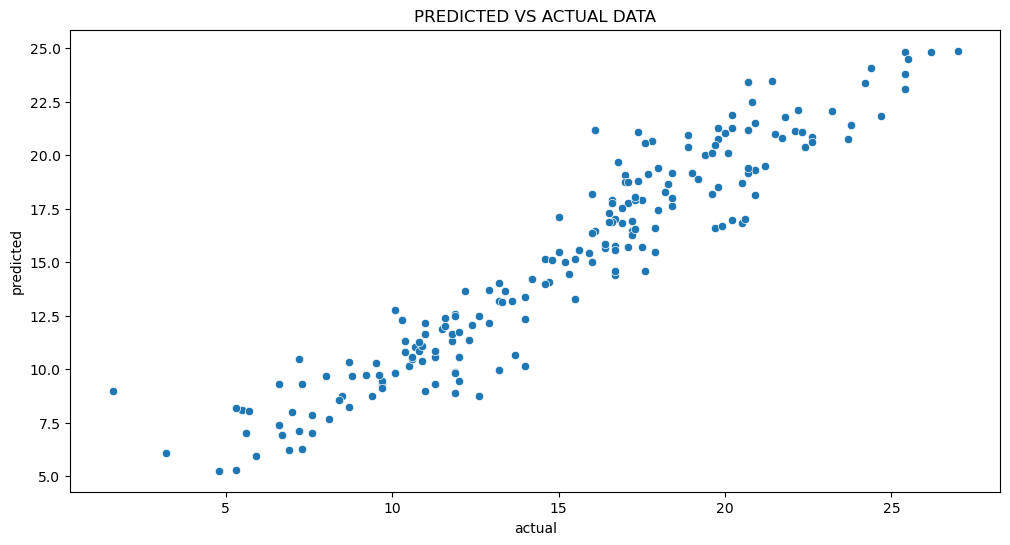

In [79]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=output,x="actual",y="predicted");

In [62]:
from pydataset import data